In [23]:
from markov_bridges.configs.config_classes.generative_models.cmb_config import CMBConfig
from markov_bridges.configs.config_classes.data.basics_configs import GaussiansConfig
from markov_bridges.configs.config_classes.trainers.trainer_config import CMBTrainerConfig
from markov_bridges.configs.config_classes.networks.mixed_networks_config import MixedDeepMLPConfig
from markov_bridges.configs.config_classes.pipelines.pipeline_configs import BasicPipelineConfig
from markov_bridges.models.trainers.cmb_trainer import CMBTrainer
from markov_bridges.utils.experiment_files import ExperimentFiles

model_config = CMBConfig()
model_config.data = GaussiansConfig(target_continuous_type="Ngaussian", 
                                    number_of_gaussians=8,
                                    has_context_discrete=False,
                                    has_target_discrete=True,
                                    batch_size=128,
                                    total_data_size=66000,
                                    train_data_size=60000,
                                    test_data_size=6000,)

model_config.mixed_network = MixedDeepMLPConfig(num_layers=4,
                                                hidden_dim=128,
                                                time_embed_dim=32,
                                                discrete_embed_dim=128)

model_config.trainer = CMBTrainerConfig(number_of_epochs=50,
                                        debug=False,
                                        learning_rate=1e-4)
model_config.trainer.metrics = []
model_config.pipeline = BasicPipelineConfig(number_of_steps=200)


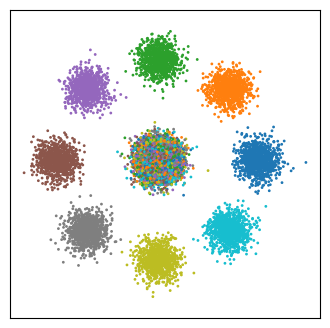

In [20]:
from markov_bridges.data.gaussians2D_dataloaders import GaussiansDataloader

dataloader = GaussiansDataloader(model_config.data)
data = dataloader.get_data_sample(sample_size=8000, train=True)

plt.figure(figsize=(4, 4))
plt.scatter(data.source_continuous[:, 0], data.source_continuous[:, 1], s=1, c=data.target_discrete, cmap="tab10", label="source")
plt.scatter(data.target_continuous[:, 0], data.target_continuous[:, 1], s=1, c=data.target_discrete, cmap="tab10", label="target")
plt.xticks([])
plt.yticks([])
plt.axis('equal')
# plt.legend()
plt.show()

In [24]:
experiment_files = ExperimentFiles(experiment_name="cmb", experiment_type="independent") 
trainer = CMBTrainer(config=model_config, experiment_files=experiment_files)
trainer.train()


# ==================================================
# START OF TRAINING 
# ==================================================
# Current Model ************************************
independent
cmb
None
# ==================================================
# Number of Epochs 50
# ==================================================


Epoch 50, Loss: 1.2946: 100%|██████████| 50/50 [06:57<00:00,  8.35s/it]


({'model': MixedDeepMLP(
    (act_fn): ReLU()
    (embedding): Embedding(8, 128)
    (encoding_model): Sequential(
      (0): Linear(in_features=162, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.2, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.2, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU()
      (11): Dropout(p=0.2, inplace=False)
      (12): Linear(in_features=128, out_features=128, bias=True)
      (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (14): ReLU()
      (15): Dropout(p=0.2, inplace=False)
    )
    (discrete

In [25]:
from markov_bridges.models.generative_models.cmb import CMB
from markov_bridges.data.gaussians2D_dataloaders import GaussiansDataloader
import torch

path = '/home/df630/markov_bridges/results/cmb/independent/1722557741'

cmb = CMB(experiment_dir=path)
model_config.pipeline.time_epsilon = 0.1
model_config.pipeline.time_steps = 10000
dataloader = GaussiansDataloader(model_config.data)

generated_continuous = []
generated_discrete = []
generated_path_continuous = []
generated_path_discrete = []

for databatch in dataloader.test():

    sample = cmb.pipeline.generate_sample(databatch, return_path=True)
    x1_continuous = sample.continuous.detach().cpu()
    x1_discrete= sample.discrete.detach().cpu()
    xt_continuous = sample.continuous_paths.detach().cpu()
    xt_discrete = sample.discrete_paths.detach().cpu()

    generated_continuous.append(x1_continuous)
    generated_discrete.append(x1_discrete)
    generated_path_continuous.append(xt_continuous)
    generated_path_discrete.append(xt_discrete)

generated_continuous = torch.cat(generated_continuous, dim=0)
generated_discrete = torch.cat(generated_discrete, dim=0)
generated_path_continuous = torch.cat(generated_path_continuous, dim=0)
generated_path_discrete = torch.cat(generated_path_discrete, dim=0)


200it [00:00, 699.28it/s]
200it [00:00, 784.55it/s]
200it [00:00, 745.45it/s]
200it [00:00, 767.99it/s]
200it [00:00, 761.87it/s]
200it [00:00, 740.40it/s]
200it [00:00, 787.20it/s]
200it [00:00, 787.66it/s]
200it [00:00, 721.46it/s]
200it [00:00, 788.41it/s]
200it [00:00, 788.70it/s]
200it [00:00, 791.02it/s]
200it [00:00, 791.07it/s]
200it [00:00, 781.33it/s]
200it [00:00, 788.17it/s]
200it [00:00, 764.66it/s]
200it [00:00, 788.81it/s]
200it [00:00, 737.43it/s]
200it [00:00, 741.85it/s]
200it [00:00, 737.44it/s]
200it [00:00, 792.67it/s]
200it [00:00, 789.03it/s]
200it [00:00, 735.47it/s]
200it [00:00, 742.65it/s]
200it [00:00, 787.85it/s]
200it [00:00, 788.48it/s]
200it [00:00, 789.24it/s]
200it [00:00, 791.33it/s]
200it [00:00, 748.56it/s]
200it [00:00, 738.76it/s]
200it [00:00, 752.10it/s]
200it [00:00, 731.26it/s]
200it [00:00, 708.73it/s]
200it [00:00, 682.73it/s]
200it [00:00, 730.53it/s]
200it [00:00, 788.49it/s]
200it [00:00, 750.17it/s]
200it [00:00, 734.74it/s]
200it [00:00

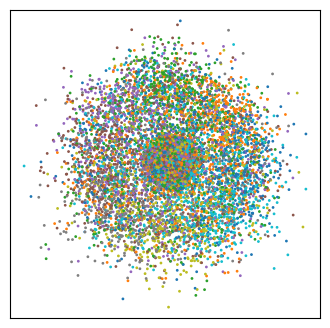

In [26]:
import matplotlib.pyplot as plt

mask = generated_path_discrete[:,-1]==3
mask = mask.squeeze()

plt.figure(figsize=(4, 4))
plt.scatter(generated_path_continuous[:, 0, 0], generated_path_continuous[:, 0, 1], s=1, c=generated_path_discrete[:,0], cmap='tab10')
plt.scatter(generated_path_continuous[:, -1, 0], generated_path_continuous[:, -1, 1], s=1, c=generated_path_discrete[:,-1], cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

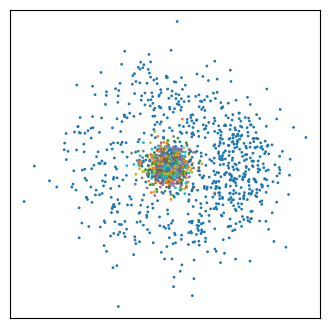

In [27]:
import matplotlib.pyplot as plt

mask = generated_path_discrete[:,-1]==0
mask = mask.squeeze()

plt.figure(figsize=(4, 4))
plt.scatter(generated_path_continuous[:, 0, 0][mask], generated_path_continuous[:, 0, 1][mask], s=1, c=generated_path_discrete[:,0][mask], cmap='tab10')
plt.scatter(generated_path_continuous[:, -1, 0][mask], generated_path_continuous[:, -1, 1][mask], s=1, c=generated_path_discrete[:,-1][mask], cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

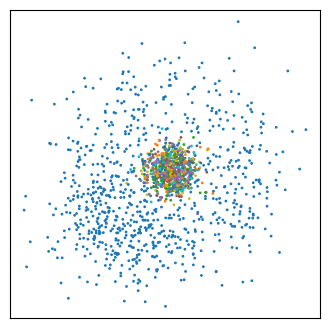

In [28]:
import matplotlib.pyplot as plt

mask = generated_path_discrete[:,-1]==5
mask = mask.squeeze()

plt.figure(figsize=(4, 4))
plt.scatter(generated_path_continuous[:, 0, 0][mask], generated_path_continuous[:, 0, 1][mask], s=1, c=generated_path_discrete[:,0][mask], cmap='tab10')
plt.scatter(generated_path_continuous[:, -1, 0][mask], generated_path_continuous[:, -1, 1][mask], s=1, c=generated_path_discrete[:,-1][mask], cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()